In [1]:
import nhandv6_package_1 as dvn
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

train_url = r"https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%201/dataset/trainset_house-price.csv"
test_url = r"https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%201/dataset/testset_house-price.csv"
df_train = pd.read_csv(train_url)
df_test = pd.read_csv(test_url)
df_train.head(5)

,price,area,status,nb_bedroom,nb_bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


<AxesSubplot:xlabel='price', ylabel='Count'>

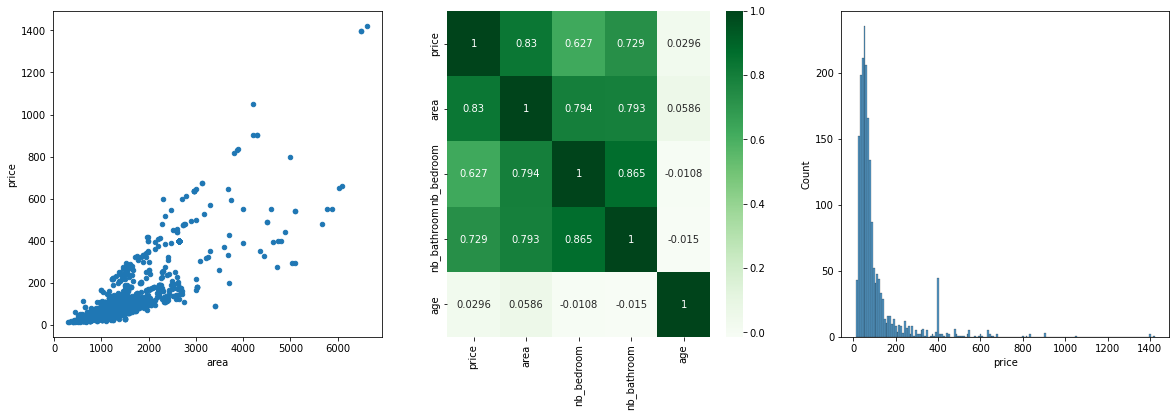

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))
df_train.plot(x = 'area', y = 'price', kind = 'scatter', ax = ax[0])
sns.heatmap(df_train.corr(), annot=True, cmap='Greens', fmt='.3g', ax = ax[1])
sns.histplot(df_train['price'], ax = ax[2])

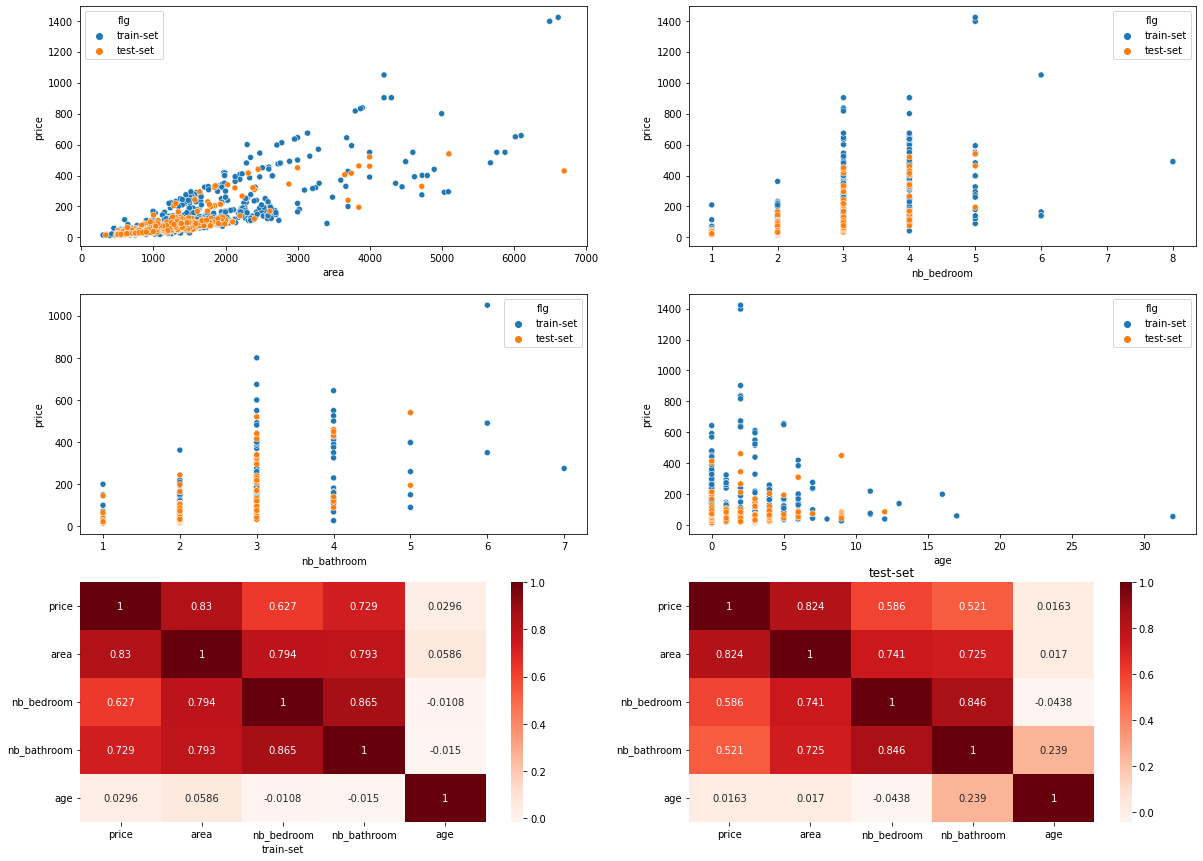

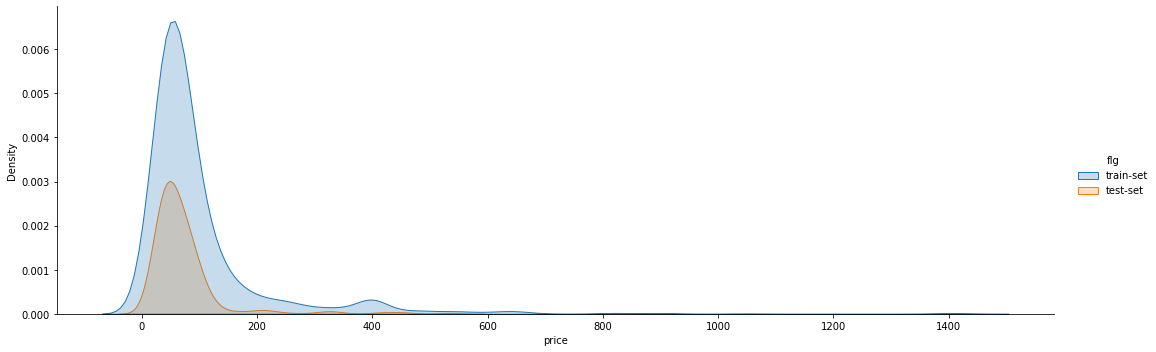

In [3]:
# used my function        
    
dvn.regression_compare(df_train, df_test, 'price')

## Check missing values

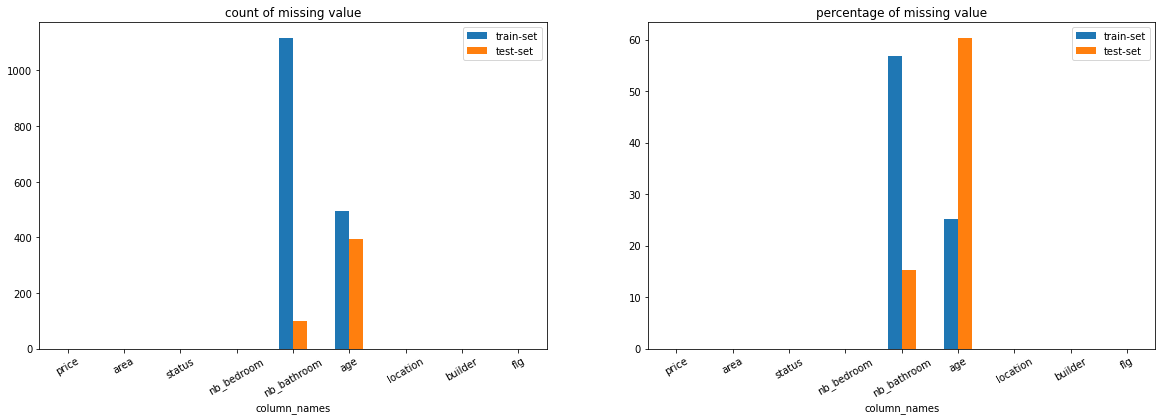

In [4]:
dvn.count_null_show(df_train, df_test)

## Checking unique, statistical_mode and assumption "category_test_value is all in train-set?"

This testing will help us decide to use the category_features in the `predictive-model` or not?

In [5]:
dvn.count_unique_and_mode(df_train, df_test)

,col_type,"(mode-vl, freq, Nb_unique)_train-set","(mode-vl, freq, Nb_unique)_test-set",is_all-test_contained_in_train ?
col_name,,,,
price,float64,"(398.0, 41, 1056)","(62.0, 19, 373)",Ignored! This column is numeric
area,int64,"(2650, 41, 876)","(1030, 18, 346)",Ignored! This column is numeric
status,object,"(Ready to move, 1006, 2)","(Ready to move, 481, 2)",True
nb_bedroom,int64,"(2, 1029, 7)","(2, 338, 5)",Ignored! This column is numeric
nb_bathroom,float64,"(2.0, 478, 8)","(2.0, 318, 6)",Ignored! This column is numeric
age,float64,"(0.0, 837, 17)","(0.0, 105, 11)",Ignored! This column is numeric
location,object,"(Pammal, 122, 157)","(Veppampattu, 60, 98)","(False, {Mahindra World City, Agaramthen, Ponn..."
builder,object,"(seller, 375, 115)","(MC Foundation, 232, 34)","(False, {Luxclusive Homes, Dee Star Properties..."
flg,object,"(train-set, 1965, 1)","(test-set, 655, 1)","(False, {test-set})"


Only the `status`'s values is all contained in the train-set from the `test-set`

## Checking the duplicated values

In [6]:
df_train.drop_duplicates().shape, df_train.shape

((1557, 9), (1965, 9))

### Model 1. Assume that

$$ y = \beta_0 + \beta_1 * \text{age} + \beta_2*\text{area} + \beta_3*\text{number_bedroom} + \beta_4*\text{number_bathroom} $$

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

fill_vl = df_train[['age', 'area', 'nb_bedroom', 'nb_bathroom']].mean()

X_train, y_train = dvn.load_data(df_train, fill_vl = fill_vl, 
                                  target_col = 'price', 
                                  inp_col_names = ['age', 'area', 'nb_bedroom', 'nb_bathroom'])
X_test, y_test = dvn.load_data(df_test, fill_vl = fill_vl, 
                                  target_col = 'price', 
                                  inp_col_names = ['age', 'area', 'nb_bedroom', 'nb_bathroom'])
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6820367473795363
0.5093962357482547


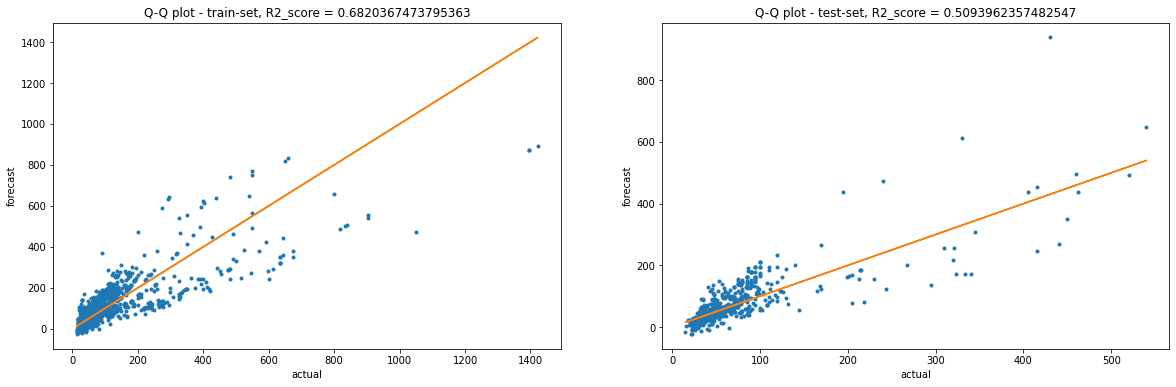

In [8]:
dvn.Q_Q_plot(clf, X_train, X_test, y_train, y_test)

## Predict a new values

In [9]:
clf.predict([[1, 1000, 2, 3]])

array([61.12435236])

## Get the `estimated coefficients`

In [10]:
clf.coef_, clf.intercept_

(array([ -1.18990369,   0.16414291, -29.50423408,   1.05662019]),
 -45.990048269734814)

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_1 = smf.ols('price ~ age + area + nb_bedroom + nb_bathroom', data=df_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     180.9
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.77e-89
Time:                        13:36:53   Log-Likelihood:                -2222.9
No. Observations:                 419   AIC:                             4456.
Df Residuals:                     414   BIC:                             4476.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -45.6621      9.088     -5.025      

### Model 2. Assume that 

$$ \log_{10}(y) = \beta_0 + \beta_1 * \log( \text{age} + c_1) + \beta_2 * \log(\text{area} + c_2) + \beta_3*\text{area_each_room}  $$

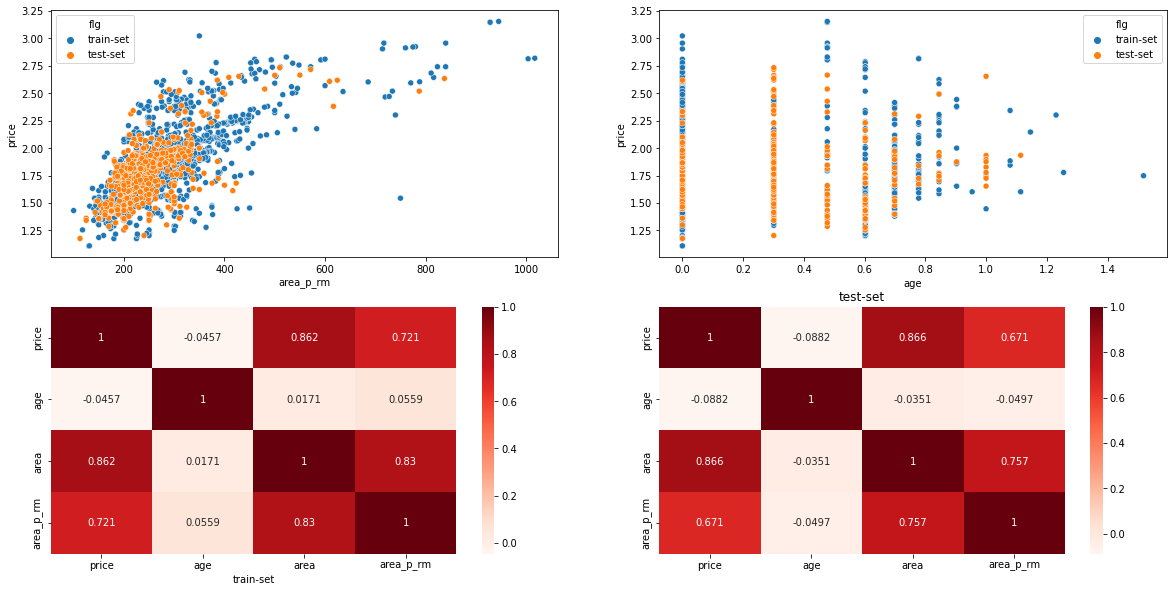

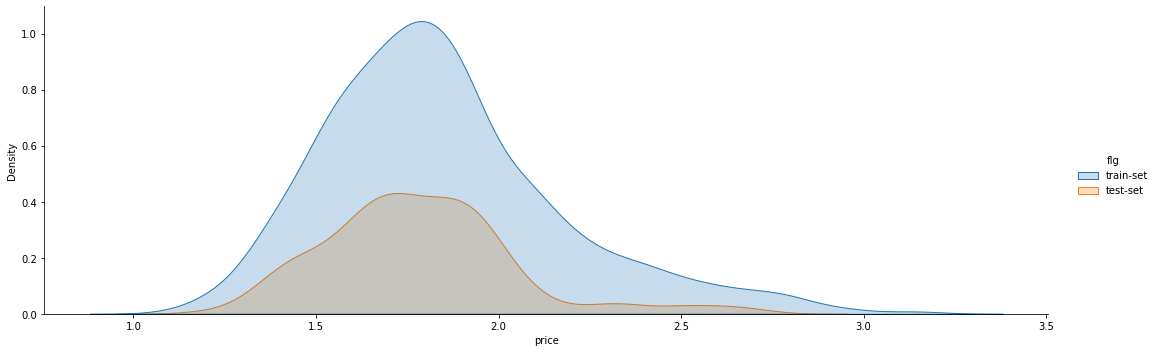

In [12]:
X_train, y_train = dvn.load_data2(df_train, fill_vl, 'price', 
                              x1_name = 'age', x2_name = 'area', 
                              x3_name = 'nb_bedroom', x4_name = 'nb_bathroom',
                              new_feat_name = 'area_p_rm',
                              c1 = 1, c2 = 100
                             )
X_test, y_test = dvn.load_data2(df_test, fill_vl, 'price', 
                              x1_name = 'age', x2_name = 'area', 
                              x3_name = 'nb_bedroom', x4_name = 'nb_bathroom',
                              new_feat_name = 'area_p_rm',
                              c1 = 1, c2 = 100
                             )
dvn.regression_compare(df_train = pd.concat([y_train, X_train], axis =1), 
                   df_test = pd.concat([y_test, X_test], axis =1), 
                   target_col = 'price') 

0.7470253661790274
0.7456030541519066


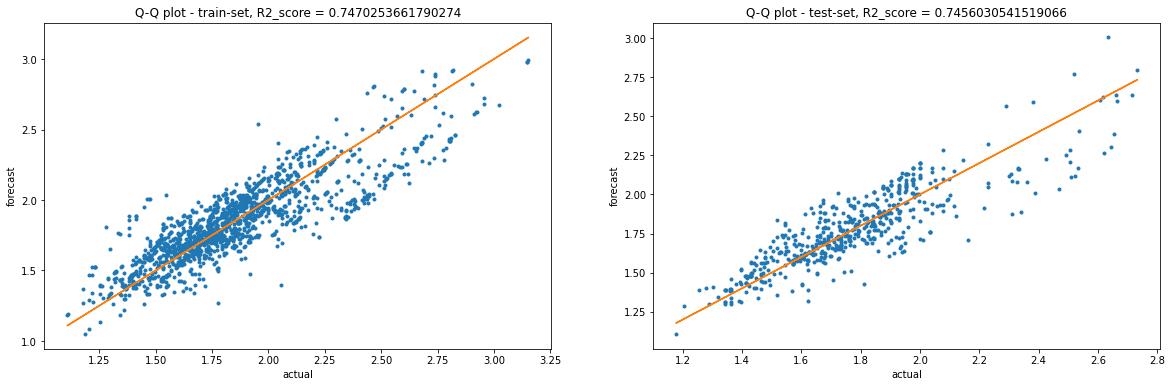

In [13]:
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

dvn.Q_Q_plot(clf, X_train, X_test, y_train, y_test)

In [14]:
model_2 = smf.ols('np.log(price) ~ age + np.log(area + 1) + area/(nb_bedroom + nb_bathroom)', data=df_train).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     228.8
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          1.40e-116
Time:                        13:36:55   Log-Likelihood:                -165.13
No. Observations:                 419   AIC:                             342.3
Df Residuals:                     413   BIC:                             366.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.0522      1.047  

### Using KFold, verify overfiting

Some examples when cross-validation can fail:

- data is ordered, and not shuffled prior to splitting
- unbalanced data (try stratified cross-validation)
- duplicates in different folds
- natural groups (e.g., data from the same user) shuffled into multiple folds

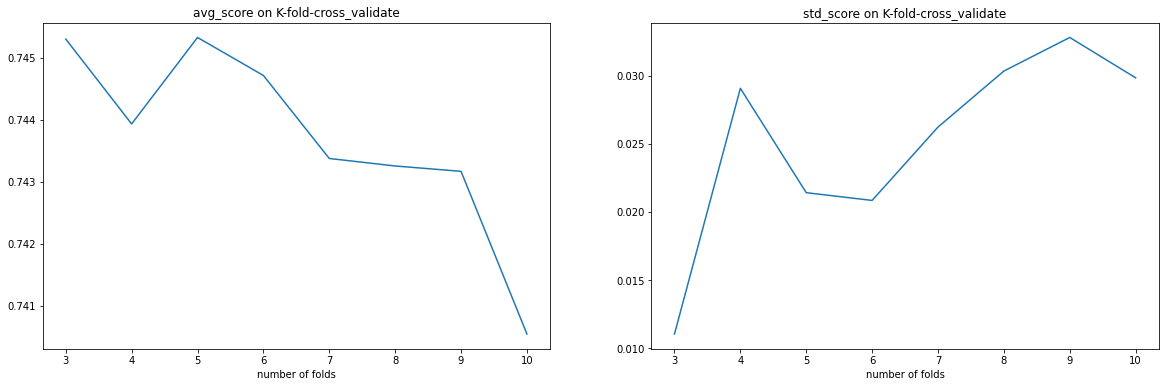

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

clf = LinearRegression()
dvn.avg_std_KFold_plot_(clf, 3, 10, X_train, y_train)        
#clf.fit(X_train, y_train)
#print(clf.score(X_test, y_test))

## Model comparison and hyper-parameters

In [16]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso

kfold_cv = KFold(n_splits = 5, shuffle = True, random_state = 53)
MLA_df = pd.DataFrame(columns = ['MLA_name', 'train-test.shape', 'trained_time', 'best_params', 
                                 'std_score_kfolds', 'train_score', 'test_score', 
                                 'MAPE_test', 'MAE_test', 'MSE_test', 'Pearson_corr'
                                ]                       
                     )
params = {
            'n_jobs' : [1, 2, 3, 4],
            'normalize' : [True, False]
          }
MLA_df.loc[0] = dvn.Grid_search_values(X_train, y_train, X_test, y_test, 
                                       LinearRegression(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617


$$ L(x_1, \ldots, x_n, y) = \sum_{k=1}^n (y_k^{\text{true}} - F_{\beta}^{\text{estimate}}(x_1, \ldots, x_n))^2 + \lambda \sum_{k=1}^n \vert \beta_k \vert $$

$$ L(x_1, \ldots, x_n, y) = \sum_{k=1}^n (y_k^{\text{true}} - F_{\beta}^{\text{estimate}}(x_1, \ldots, x_n))^2 + \lambda \sum_{k=1}^n \beta_k^2 $$

In [17]:
params = {
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
            'max_iter' : [100, 1000, 10000],
            'tol': [1e-1, 1e-3, 1e-5], 
            'alpha': [1.0, 0.1, 0.01]
        }
MLA_df.loc[1] = dvn.Grid_search_values(X_train, y_train, X_test, y_test, 
                                       Ridge(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620


In [18]:
params = {
            'selection': ['cyclic', 'random'],
            'max_iter' : [100, 1000, 10000],
            'tol': [1e-1, 1e-3, 1e-5], 
            'alpha': [1.0, 0.1, 0.01]
        }

MLA_df.loc[2] = dvn.Grid_search_values(X_train, y_train, X_test, y_test, 
                                       Lasso(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620
2,Lasso,"((1557, 3), (566, 3))",0 mins 1.52 seconds,"{'alpha': 0.01, 'max_iter': 100, 'selection': ...",0.014519,0.739178,0.745787,0.055385,0.099987,0.017533,0.865724


In [19]:
parameters = {
              'n_estimators': [50, 100, 200],
              'criterion' : ["squared_error", "absolute_error"],
              'max_depth': [8, 10, 25],
              'bootstrap' : [True]# [True, False]
             }
MLA_df.loc[3] = dvn.Grid_search_values(X_train, y_train, X_test, y_test, 
                                       ExtraTreesRegressor(), parameters, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620
2,Lasso,"((1557, 3), (566, 3))",0 mins 1.52 seconds,"{'alpha': 0.01, 'max_iter': 100, 'selection': ...",0.014519,0.739178,0.745787,0.055385,0.099987,0.017533,0.865724
3,ExtraTreesRegressor,"((1557, 3), (566, 3))",1 mins 1.58 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.033350,0.849740,0.752470,0.052847,0.096873,0.017072,0.870089


In [20]:
params = {
            'n_estimators': [80, 100, 200],
            'max_depth': [5, 7, 9, 11],
            'min_samples_split': [1, 3],
            'min_samples_leaf': [1, 3],
            'bootstrap' : [True] # [True, False]
          }

MLA_df.loc[4] = dvn.Grid_search_values(X_train, y_train, X_test, y_test, 
                                       RandomForestRegressor(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620
2,Lasso,"((1557, 3), (566, 3))",0 mins 1.52 seconds,"{'alpha': 0.01, 'max_iter': 100, 'selection': ...",0.014519,0.739178,0.745787,0.055385,0.099987,0.017533,0.865724
3,ExtraTreesRegressor,"((1557, 3), (566, 3))",1 mins 1.58 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.033350,0.849740,0.752470,0.052847,0.096873,0.017072,0.870089
4,RandomForestRegressor,"((1557, 3), (566, 3))",0 mins 39.94 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.030912,0.838546,0.744862,0.053565,0.098319,0.017597,0.868208


## What happend if we add the category-features into this model.
In this case, the `dummy_features` contains the binary values, so we will use the function `pd.get_dummies(category_data)`

In [21]:
cate_col_list = ['status'] # , 'location', 'builder' is not contained all from test-set to train-set
full_data = pd.concat([df_train, df_test])
cate_data = pd.get_dummies(full_data[cate_col_list])
X_cate_train = cate_data.iloc[X_train.index]
X_cate_test = cate_data.iloc[X_test.index]

xtrain = pd.concat([X_cate_train, X_train], axis = 1)
xtest = pd.concat([X_cate_test, X_test], axis = 1)

In [22]:
params = {
            'n_estimators': [80, 100, 200],
            'max_depth': [5, 7, 9, 11],
            'min_samples_split': [1, 3],
            'min_samples_leaf': [1, 3],
            'bootstrap' : [True] # [True, False]
          }

MLA_df.loc[5] = dvn.Grid_search_values(xtrain, y_train, xtest, y_test, 
                                       RandomForestRegressor(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620
2,Lasso,"((1557, 3), (566, 3))",0 mins 1.52 seconds,"{'alpha': 0.01, 'max_iter': 100, 'selection': ...",0.014519,0.739178,0.745787,0.055385,0.099987,0.017533,0.865724
3,ExtraTreesRegressor,"((1557, 3), (566, 3))",1 mins 1.58 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.033350,0.849740,0.752470,0.052847,0.096873,0.017072,0.870089
4,RandomForestRegressor,"((1557, 3), (566, 3))",0 mins 39.94 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.030912,0.838546,0.744862,0.053565,0.098319,0.017597,0.868208
5,RandomForestRegressor,"((1557, 5), (566, 5))",0 mins 42.17 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.028157,0.840224,0.746607,0.053143,0.097791,0.017476,0.870591


In [23]:
params = {
            'n_jobs' : [1, 2, 3, 4],
            'normalize' : [True, False]
          }
MLA_df.loc[7] = dvn.Grid_search_values(xtrain, y_train, xtest, y_test, 
                                       LinearRegression(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620
2,Lasso,"((1557, 3), (566, 3))",0 mins 1.52 seconds,"{'alpha': 0.01, 'max_iter': 100, 'selection': ...",0.014519,0.739178,0.745787,0.055385,0.099987,0.017533,0.865724
3,ExtraTreesRegressor,"((1557, 3), (566, 3))",1 mins 1.58 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.033350,0.849740,0.752470,0.052847,0.096873,0.017072,0.870089
4,RandomForestRegressor,"((1557, 3), (566, 3))",0 mins 39.94 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.030912,0.838546,0.744862,0.053565,0.098319,0.017597,0.868208
5,RandomForestRegressor,"((1557, 5), (566, 5))",0 mins 42.17 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.028157,0.840224,0.746607,0.053143,0.097791,0.017476,0.870591
7,LinearRegression,"((1557, 5), (566, 5))",0 mins 0.28 seconds,"{'n_jobs': 1, 'normalize': True}",0.021541,0.747016,0.745719,0.054602,0.099648,0.017538,0.868472


In [24]:
parameters = {
              'n_estimators': [50, 100],
              'criterion' : ["squared_error", "absolute_error"],
              'max_depth': [8, 15],
              'bootstrap' : [True] # [True, False]
             }
MLA_df.loc[6] = dvn.Grid_search_values(xtrain, y_train, xtest, y_test, 
                                       ExtraTreesRegressor(), parameters, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620
2,Lasso,"((1557, 3), (566, 3))",0 mins 1.52 seconds,"{'alpha': 0.01, 'max_iter': 100, 'selection': ...",0.014519,0.739178,0.745787,0.055385,0.099987,0.017533,0.865724
3,ExtraTreesRegressor,"((1557, 3), (566, 3))",1 mins 1.58 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.033350,0.849740,0.752470,0.052847,0.096873,0.017072,0.870089
4,RandomForestRegressor,"((1557, 3), (566, 3))",0 mins 39.94 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.030912,0.838546,0.744862,0.053565,0.098319,0.017597,0.868208
5,RandomForestRegressor,"((1557, 5), (566, 5))",0 mins 42.17 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.028157,0.840224,0.746607,0.053143,0.097791,0.017476,0.870591
7,LinearRegression,"((1557, 5), (566, 5))",0 mins 0.28 seconds,"{'n_jobs': 1, 'normalize': True}",0.021541,0.747016,0.745719,0.054602,0.099648,0.017538,0.868472
6,ExtraTreesRegressor,"((1557, 5), (566, 5))",0 mins 25.0 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.030198,0.819597,0.759133,0.052749,0.096109,0.016612,0.873615


In [25]:
params = {'n_estimators': [100, 150, 200],
          'loss': ['squared_error', 'absolute_error'],
          'learning_rate': [0.1, 1e-3],
          'max_depth': [8, 15]          
         }
MLA_df.loc[8] = dvn.Grid_search_values(xtrain, y_train, xtest, y_test, 
                                       GradientBoostingRegressor(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620
2,Lasso,"((1557, 3), (566, 3))",0 mins 1.52 seconds,"{'alpha': 0.01, 'max_iter': 100, 'selection': ...",0.014519,0.739178,0.745787,0.055385,0.099987,0.017533,0.865724
3,ExtraTreesRegressor,"((1557, 3), (566, 3))",1 mins 1.58 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.033350,0.849740,0.752470,0.052847,0.096873,0.017072,0.870089
4,RandomForestRegressor,"((1557, 3), (566, 3))",0 mins 39.94 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.030912,0.838546,0.744862,0.053565,0.098319,0.017597,0.868208
5,RandomForestRegressor,"((1557, 5), (566, 5))",0 mins 42.17 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.028157,0.840224,0.746607,0.053143,0.097791,0.017476,0.870591
7,LinearRegression,"((1557, 5), (566, 5))",0 mins 0.28 seconds,"{'n_jobs': 1, 'normalize': True}",0.021541,0.747016,0.745719,0.054602,0.099648,0.017538,0.868472
6,ExtraTreesRegressor,"((1557, 5), (566, 5))",0 mins 25.0 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.030198,0.819597,0.759133,0.052749,0.096109,0.016612,0.873615
8,GradientBoostingRegressor,"((1557, 5), (566, 5))",5 mins 51.93 seconds,"{'learning_rate': 0.1, 'loss': 'absolute_error...",0.022662,0.850227,0.743028,0.051262,0.094212,0.017723,0.862409


In [26]:
params = {'n_estimators': [100, 150, 200],
          'learning_rate': [0.1, 1e-3, 1e-5]
         }
MLA_df.loc[9] = dvn.Grid_search_values(xtrain, y_train, xtest, y_test, 
                                       AdaBoostRegressor(), params, kfold_cv)
MLA_df

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620
2,Lasso,"((1557, 3), (566, 3))",0 mins 1.52 seconds,"{'alpha': 0.01, 'max_iter': 100, 'selection': ...",0.014519,0.739178,0.745787,0.055385,0.099987,0.017533,0.865724
3,ExtraTreesRegressor,"((1557, 3), (566, 3))",1 mins 1.58 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.033350,0.849740,0.752470,0.052847,0.096873,0.017072,0.870089
4,RandomForestRegressor,"((1557, 3), (566, 3))",0 mins 39.94 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.030912,0.838546,0.744862,0.053565,0.098319,0.017597,0.868208
5,RandomForestRegressor,"((1557, 5), (566, 5))",0 mins 42.17 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.028157,0.840224,0.746607,0.053143,0.097791,0.017476,0.870591
7,LinearRegression,"((1557, 5), (566, 5))",0 mins 0.28 seconds,"{'n_jobs': 1, 'normalize': True}",0.021541,0.747016,0.745719,0.054602,0.099648,0.017538,0.868472
6,ExtraTreesRegressor,"((1557, 5), (566, 5))",0 mins 25.0 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.030198,0.819597,0.759133,0.052749,0.096109,0.016612,0.873615
8,GradientBoostingRegressor,"((1557, 5), (566, 5))",5 mins 51.93 seconds,"{'learning_rate': 0.1, 'loss': 'absolute_error...",0.022662,0.850227,0.743028,0.051262,0.094212,0.017723,0.862409
9,AdaBoostRegressor,"((1557, 5), (566, 5))",0 mins 16.71 seconds,"{'learning_rate': 1e-05, 'n_estimators': 150}",0.017594,0.752885,0.718207,0.058598,0.105789,0.019435,0.854999


## Final conclusion

$$ \begin{array}{lcl} R^2_{\text{score}} \text{ (coefficient of determinant) } &=& 1 - \dfrac{SSR}{SST} \\ R^2_{\text{adj}} \text{ (Adjusted R Squared)} &=& 1 - \left( \dfrac{(n - 1) \left( 1 - R^2_{\text{score}} \right)}{n - k - 1} \right) \\ \text{MAPE} \text{ (Mean Absolute Percentage Error)} &=& \dfrac{1}{n} \displaystyle \sum_{k=1}^n \left\vert \dfrac{y_k^{\text{true}} - y_k^{\text{pred}}}{y_i^{\text{true}}} \right\vert \\ \text{MAE} \text{ (Mean Absolute Error)} &=& \dfrac{1}{n} \displaystyle \sum_{k=1}^n \left\vert y_k^{\text{true}} - y_k^{\text{pred}} \right\vert \\ \text{MSE}  \text{ (Mean Squared Error)} &=& \dfrac{1}{n} \displaystyle \sum_{k=1}^n \left( y_k^{\text{true}} - y_k^{\text{pred}} \right)^2 \\ \text{RMSE}  \text{ (Root Mean Squared Error)} &=& \sqrt{\text{MSE}} \\ \text{RMSLE}  \text{ (Root Mean Squared Logaritmic Error)} &=& \dfrac{1}{n} \displaystyle \sqrt{ \sum_{k=1}^n \left( \log(y_k^{\text{pred}} + 1) - \log(y_k^{\text{true}} + 1) \right)^2 } \\ \text{AIC} \text{ (Akaike Information Criterion)} &=& \dfrac{2}{n} \left( k - LL \right) \\  \text{BIC}  \text{ (Bayesian Information Criterion)} &=& -2 LL + k \log(n) \end{array}$$

In [27]:
MLA_df.sort_values(by = 'test_score', ascending = False)

,MLA_name,train-test.shape,trained_time,best_params,std_score_kfolds,train_score,test_score,MAPE_test,MAE_test,MSE_test,Pearson_corr
6,ExtraTreesRegressor,"((1557, 5), (566, 5))",0 mins 25.0 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.030198,0.819597,0.759133,0.052749,0.096109,0.016612,0.873615
3,ExtraTreesRegressor,"((1557, 3), (566, 3))",1 mins 1.58 seconds,"{'bootstrap': True, 'criterion': 'squared_erro...",0.033350,0.849740,0.752470,0.052847,0.096873,0.017072,0.870089
5,RandomForestRegressor,"((1557, 5), (566, 5))",0 mins 42.17 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.028157,0.840224,0.746607,0.053143,0.097791,0.017476,0.870591
2,Lasso,"((1557, 3), (566, 3))",0 mins 1.52 seconds,"{'alpha': 0.01, 'max_iter': 100, 'selection': ...",0.014519,0.739178,0.745787,0.055385,0.099987,0.017533,0.865724
7,LinearRegression,"((1557, 5), (566, 5))",0 mins 0.28 seconds,"{'n_jobs': 1, 'normalize': True}",0.021541,0.747016,0.745719,0.054602,0.099648,0.017538,0.868472
1,Ridge,"((1557, 3), (566, 3))",0 mins 3.79 seconds,"{'alpha': 0.1, 'max_iter': 100, 'solver': 'spa...",0.021196,0.747025,0.745714,0.054673,0.099711,0.017538,0.868620
0,LinearRegression,"((1557, 3), (566, 3))",0 mins 0.25 seconds,"{'n_jobs': 1, 'normalize': True}",0.021413,0.747025,0.745603,0.054694,0.099749,0.017546,0.868617
4,RandomForestRegressor,"((1557, 3), (566, 3))",0 mins 39.94 seconds,"{'bootstrap': True, 'max_depth': 7, 'min_sampl...",0.030912,0.838546,0.744862,0.053565,0.098319,0.017597,0.868208
8,GradientBoostingRegressor,"((1557, 5), (566, 5))",5 mins 51.93 seconds,"{'learning_rate': 0.1, 'loss': 'absolute_error...",0.022662,0.850227,0.743028,0.051262,0.094212,0.017723,0.862409
9,AdaBoostRegressor,"((1557, 5), (566, 5))",0 mins 16.71 seconds,"{'learning_rate': 1e-05, 'n_estimators': 150}",0.017594,0.752885,0.718207,0.058598,0.105789,0.019435,0.854999


## Exercise
Student choose one of 2 exercise below
### EX 1.
- Use the `sns.load_dataset("tips")` as below

In [28]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


- split dataset into train and test by the given function "split_data()" from `nhandv6_package_1`
        
        
        import nhandv6_package_1 as dvn

        df_train, df_test = dvn.split_data(tips_df, ['sex', 'smoker', 'time'], test_size = 0.33)

In [29]:
from sklearn.model_selection import train_test_split

df_train, df_test = dvn.split_data(tips_df, ['sex', 'smoker', 'time'], test_size = 0.33)

- predict a model of `tip` based on `total_bill, size` and the other features! Do it yourself!

In [30]:
model = smf.ols('tip ~ total_bill + size', data=df_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     86.72
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           3.08e-26
Time:                        13:46:00   Log-Likelihood:                -233.42
No. Observations:                 163   AIC:                             472.8
Df Residuals:                     160   BIC:                             482.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5673      0.235      2.415      0.0

## EX 2.
Use the 2 dataset [wages_train.csv](https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%201/dataset/wages_train.csv) and [wages_test.csv](https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%201/dataset/wages_test.csv) in the folder dataset in MyGithub.

Create the regression model that explained these datasets.

In [31]:
wage_train_url = "https://raw.githubusercontent.com/Nhan121/Lectures_notes-teaching-in-VN-/master/US-Embassy_DS-course/Class%201/dataset/wages_train.csv"
wage_train = pd.read_csv(wage_train_url)
wage_train.head()

,wages,w_hours,w_days,kpi,base,age,nationality,gender
0,148.07,36.3,7,0.8,121,21.0,NE,F
1,35.55,15.1,2,1.2,238,19.0,TN,F
2,4.50,5.5,1,0.8,217,19.0,NE,M
3,2822.80,133.5,18,1.0,242,42.0,DE,M
4,7.23,7.4,1,1.0,162,18.0,NI,M
